In [2]:
import numpy as np
import pandas as pd 
from sklearn import preprocessing

import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder


# 0. Idée de manoeuvre pré-majoration

Y a eu un kaggle sur le sujet, on va donc s'en inspirer. (ce n'est pas le même dataset)
Voici le lien du kaggle: https://www.kaggle.com/c/home-credit-default-risk/overview

Voici un notebook introductif: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

Voici un notebook avec un bon score: https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features

J'ai bien envie de combiner un neural network et un XGBoost, en général c'est bénèf. 

# 1. Exploration of the data

In [3]:
data = pd.read_csv('data/CreditTraining.csv')
data.head()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D


In [4]:
data

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D
5,3858,0,Existing Client,04/03/1983,15/09/2011,NP_Client,University,Married,0.0,28,60,2.0,C,04/10/2011,Sales,Old rent,1,NaN,C
6,2189,0,Non Existing Client,25/09/1979,17/07/2011,NP_Client,University,Married,0.0,10,36,1.0,C,28/07/2011,Sales,Owned,1,NaN,B
7,9338,0,Non Existing Client,04/10/1953,11/04/2012,NP_Client,University,Married,0.0,15,36,1.0,C,12/04/2012,Sales,Owned,1,16/04/2013,B
8,9578,0,Existing Client,01/03/1974,20/02/2001,NP_Client,University,Single,0.0,0,500,3.0,P,02/04/2012,Branch,Owned,1,NaN,E
9,173,1,Existing Client,13/02/1963,27/04/2011,NP_Client,University,Married,4.0,35,"87,6",2.0,C,03/05/2011,Sales,Owned,1,18/11/2012,L


On a un problème avec Net_Annual_Income qui est pas enregistré en float, ce qui est pas très pratique. Le problème c'est que pour l'enregistrer en float il faut changer les ',' en '.'.

In [6]:
data['Net_Annual_Income'] = data['Net_Annual_Income'].str.replace(',', '.').astype(float)

In [7]:
data.astype({'Net_Annual_Income': 'float64'}).dtypes

Id_Customer              int64
Y                        int64
Customer_Type           object
BirthDate               object
Customer_Open_Date      object
P_Client                object
Educational_Level       object
Marital_Status          object
Number_Of_Dependant    float64
Years_At_Residence       int64
Net_Annual_Income      float64
Years_At_Business      float64
Prod_Sub_Category       object
Prod_Decision_Date      object
Source                  object
Type_Of_Residence       object
Nb_Of_Products           int64
Prod_Closed_Date        object
Prod_Category           object
dtype: object

In [8]:
data.dtypes

Id_Customer              int64
Y                        int64
Customer_Type           object
BirthDate               object
Customer_Open_Date      object
P_Client                object
Educational_Level       object
Marital_Status          object
Number_Of_Dependant    float64
Years_At_Residence       int64
Net_Annual_Income      float64
Years_At_Business      float64
Prod_Sub_Category       object
Prod_Decision_Date      object
Source                  object
Type_Of_Residence       object
Nb_Of_Products           int64
Prod_Closed_Date        object
Prod_Category           object
dtype: object

On trace des histogrammes pour les variables continues, voir si on observe quelque chose, peut-être des outliers...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1176ef60>]],
      dtype=object)

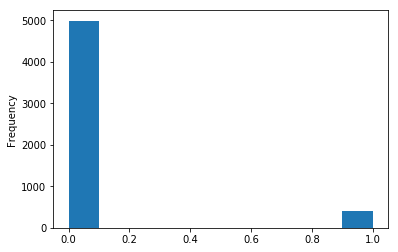

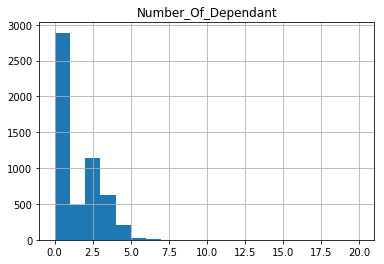

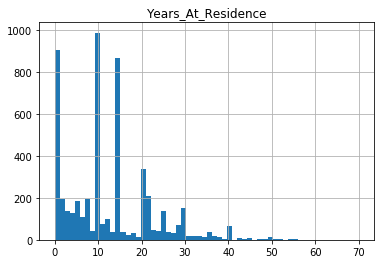

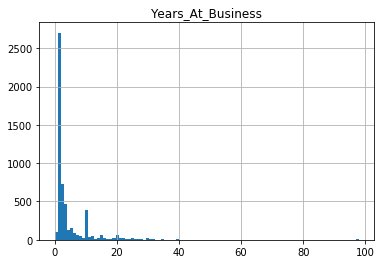

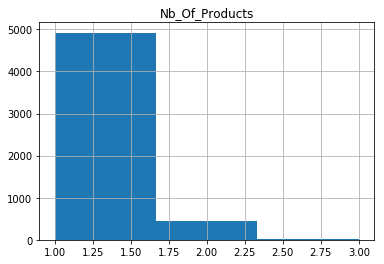

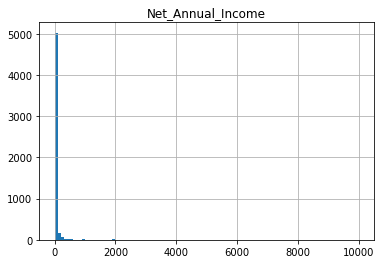

In [9]:
data['Y'].astype(int).plot.hist();

data.hist(column = 'Number_Of_Dependant', bins = 20)
data.hist(column = 'Years_At_Residence', bins = 60)
data.hist(column = 'Years_At_Business', bins = 100)
data.hist(column = 'Nb_Of_Products', bins = 3)
data.hist(column = 'Net_Annual_Income',bins = 100)

Intéressant de remarquer que pour la catégorie 'Years_At_Residence' on a des gros regroupements autour de 10,20 et 30, comme si on avait une grosse partie de gens qui arrondissaient sur ces valeurs là, peut-être que ca induit un certain biais.

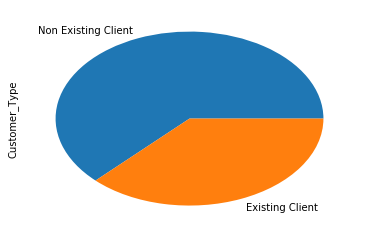

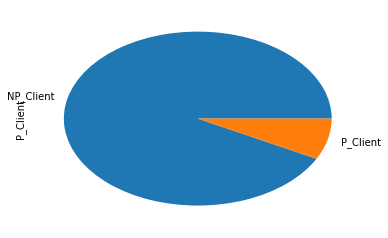

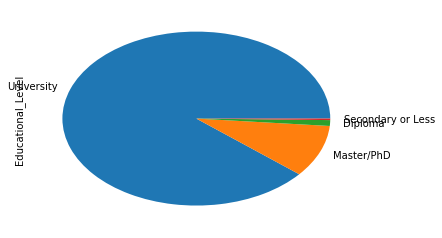

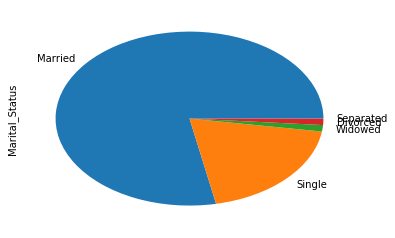

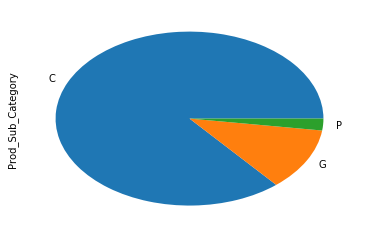

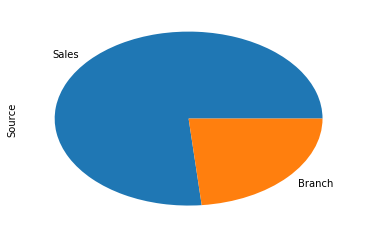

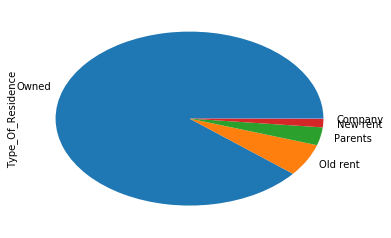

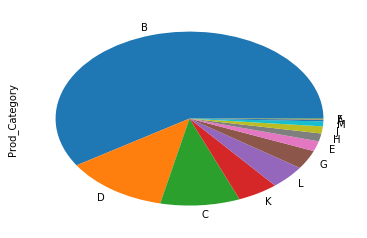

In [35]:

data['Customer_Type'].value_counts().plot.pie()
plt.show()

data['P_Client'].value_counts().plot.pie()
plt.show()

data['Educational_Level'].value_counts().plot.pie()
plt.show()

data['Marital_Status'].value_counts().plot.pie()
plt.show()

data['Prod_Sub_Category'].value_counts().plot.pie()
plt.show()

data['Source'].value_counts().plot.pie()
plt.show()

data['Type_Of_Residence'].value_counts().plot.pie()
plt.show()

data['Prod_Category'].value_counts().plot.pie()
plt.show()




On regarde aussi une description de tout ce qu'on a en variables categorielles (sauf les dates) pour voir la répartition de ce qu'on a.

La commande suivante permet de compter le nombre de valeurs manquantes pour chaque colonne.

In [9]:
data.isna().sum()

Id_Customer               0
Y                         0
Customer_Type             0
BirthDate                 0
Customer_Open_Date        0
P_Client                  0
Educational_Level         0
Marital_Status            0
Number_Of_Dependant       2
Years_At_Residence        0
Net_Annual_Income         2
Years_At_Business         2
Prod_Sub_Category         0
Prod_Decision_Date        0
Source                    0
Type_Of_Residence         0
Nb_Of_Products            0
Prod_Closed_Date       4206
Prod_Category             0
dtype: int64

### Traitement des outliers pour 'Years_At_Business'

In [10]:
data['Years_At_Business'].describe()

count    5378.000000
mean        4.266270
std         7.225926
min         0.000000
25%         1.000000
50%         1.000000
75%         4.000000
max        98.000000
Name: Years_At_Business, dtype: float64

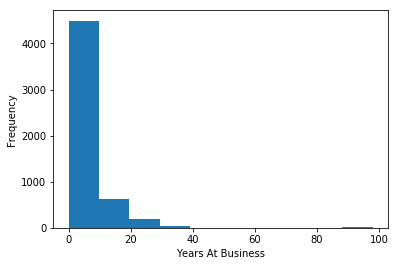

In [11]:
data['Years_At_Business'].plot.hist();
plt.xlabel('Years At Business');

In [18]:
outliers = data[data['Years_At_Business'] >= 90]
print('There seem to be '+ str(len(outliers)) + ' outliers.')

There seem to be 10 outliers.


# 2. Data transformation 

## Label-encoding

Pour certaines variables, on peut simplement faire du Label encoding, comme par exemple pour la première colonne : Customer_Type, ou on va considérer Existing Client = 0, non existing client = 1. Pour être plus efficace, on va effetctuer un label encoding pour toutes les variables categorielles qui ont seulement 2 categories.

In [4]:
le = preprocessing.LabelEncoder()
le.fit(data['Customer_Type'])

LabelEncoder()

In [5]:
list(le.classes_)

['Existing Client', 'Non Existing Client']

In [7]:
le.transform(data['Customer_Type']) 

array([1, 0, 1, ..., 1, 1, 1])

In [9]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


## One-hot encoding

Ici c'est simple, il existe une fonction pandas déjà écrite pour ca.

In [11]:
data = pd.get_dummies(data)

### Removing outliers

Here we remove outliers by replacing their value to a NaN.

In [19]:
data["Years_At_Business"].replace({97: np.nan}, inplace = True)
data["Years_At_Business"].replace({98: np.nan}, inplace = True)


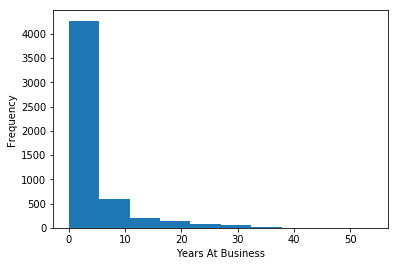

In [21]:
data['Years_At_Business'].plot.hist();
plt.xlabel('Years At Business');

MUCH BETTER

# 3. Data split 

# 4. Comparison of different models 

# 5. Tuning of the model 

# 6. Conclusion 